In [1]:
## This notebook aims to reproduce some of the graphs on Our World in Data's 
## report on mental health in 2021
# https://ourworldindata.org/mental-health

import geopandas
import matplotlib.pyplot as plt


ModuleNotFoundError: ignored

In [2]:
# This is collab, I have to install geopandas each time
%pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 6.4 MB/s 
     |████████████████████████████████| 16.7 MB 41.5 MB/s 
     |████████████████████████████████| 6.3 MB 31.6 MB/s 


In [4]:
import geopandas
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# https://ourworldindata.org/mental-health
# Our World in data, year=2021
# Saloni Dattani and Hannah Ritchie and Max Roser
# Mental Health 
mentalh = pd.read_csv("https://ourworldindata.org/8562ce1f-d264-4c63-b374-5b624060a55e")

HTTPError: ignored

In [6]:
# Arright, the URL they gave me only works once.  Download from local, upload 
# share-with-mental-and-substance-disorders.csv 

from google.colab import files
files.upload()


Saving share-with-mental-and-substance-disorders.csv to share-with-mental-and-substance-disorders.csv


{'share-with-mental-and-substance-disorders.csv': b"Entity,Code,Year,Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)\nAfghanistan,AFG,1990,16.66\nAfghanistan,AFG,1991,16.77\nAfghanistan,AFG,1992,16.87\nAfghanistan,AFG,1993,16.99\nAfghanistan,AFG,1994,17.11\nAfghanistan,AFG,1995,17.24\nAfghanistan,AFG,1996,17.39\nAfghanistan,AFG,1997,17.57\nAfghanistan,AFG,1998,17.75\nAfghanistan,AFG,1999,17.88\nAfghanistan,AFG,2000,17.94\nAfghanistan,AFG,2001,17.93\nAfghanistan,AFG,2002,17.92\nAfghanistan,AFG,2003,17.89\nAfghanistan,AFG,2004,17.86\nAfghanistan,AFG,2005,17.82\nAfghanistan,AFG,2006,17.77\nAfghanistan,AFG,2007,17.69\nAfghanistan,AFG,2008,17.58\nAfghanistan,AFG,2009,17.48\nAfghanistan,AFG,2010,17.4\nAfghanistan,AFG,2011,17.32\nAfghanistan,AFG,2012,17.26\nAfghanistan,AFG,2013,17.2\nAfghanistan,AFG,2014,17.15\nAfghanistan,AFG,2015,17.13\nAfghanistan,AFG,2016,17.11\nAfghanistan,AFG,2017,17.1\nAfghanistan,AFG,2018,17.1\nAfghanistan,AFG,2019,17.12\nAfrican Region (WH

In [7]:
#can I see it?  Where am i?
pwd

'/content'

In [8]:
ls

sample_data/  share-with-mental-and-substance-disorders.csv


In [9]:
mentalh = pd.read_csv("share-with-mental-and-substance-disorders.csv")

In [10]:
import geopandas as geo


In [11]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [18]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


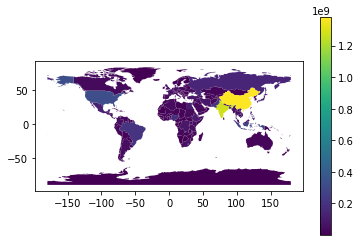

In [15]:
# This is the sample figure from https://geopandas.org/en/stable/docs/user_guide/mapping.html 
fig, ax = plt.subplots(1, 1)
world.plot(column='pop_est', ax=ax, legend=True)


In [16]:
mentalh

,Entity,Code,Year,Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,16.66
1,Afghanistan,AFG,1991,16.77
2,Afghanistan,AFG,1992,16.87
3,Afghanistan,AFG,1993,16.99
4,Afghanistan,AFG,1994,17.11
...,...,...,...,...
6747,Zimbabwe,ZWE,2015,11.16
6748,Zimbabwe,ZWE,2016,11.16
6749,Zimbabwe,ZWE,2017,11.17
6750,Zimbabwe,ZWE,2018,11.16


In [17]:
mentalh["pct"] = mentalh["Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)"]

In [21]:
merged = world.merge(mentalh.query("Year == 2019"), left_on = "name", right_on="Entity" )

In [24]:
len(merged), len(world), len(mentalh.query("Year==2019"))
merged.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Entity,Code,Year,Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent),pct
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,FJI,2019,11.54,11.54
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,TZA,2019,12.58,12.58
2,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,CAN,2019,14.95,14.95
3,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,KAZ,2019,10.61,10.61
4,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,UZB,2019,10.56,10.56


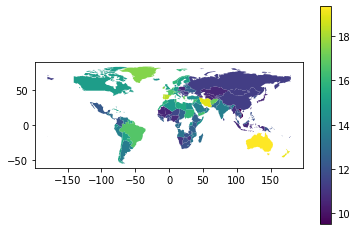

In [26]:
fig, ax = plt.subplots(1, 1)
merged.plot(column='pct', ax=ax, legend=True)

In [ ]:
# What's wrong with this picture?  

# Some countries are missing.  DRC, USA, Ivory Coast

In [31]:
world.name.to_csv("World-countries.csv")

In [33]:
files.download("World-countries.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
allmerged = world.merge(mentalh.query("Year == 2019"), left_on = "name", right_on="Entity", how="outer" )

In [36]:
allmerged.head(1)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Entity,Code,Year,Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent),pct
0,920938.0,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,FJI,2019.0,11.54,11.54


In [37]:
mergefail = allmerged[["name", "Entity"]]

In [38]:
mergefail.to_csv("mergefail.csv")

In [39]:
files.download("mergefail.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Interlude outside of the notebook : I will use a spreadsheet to sort
# and try to align these left-country names and right-country names
# and put the result in DATA.
# fixme.csv should have two columns, one with world.name values and one
# with corresponding mentalh.Entity country names

In [44]:
files.upload()

Saving fixme.csv to fixme (1).csv


{'fixme.csv': b'Bosnia and Herz.\tBosnia and Herzegovina\nCentral African Rep.\tCentral African Republic\nDem. Rep. Congo\tDemocratic Republic of Congo\nDominican Rep.\tDominican Republic\neSwatini\tEswatini\nUnited States of America\tUnited States\n'}

In [46]:
h = {}
for line in open("fixme.csv").readlines():
    fields = line.strip().split("\t")
    print(fields[0], fields[1])

Bosnia and Herz. Bosnia and Herzegovina
Central African Rep. Central African Republic
Dem. Rep. Congo Democratic Republic of Congo
Dominican Rep. Dominican Republic
eSwatini Eswatini
United States of America United States


IndexError: ignored

In [47]:
h = {}
for line in open("fixme.csv").readlines():
    fields = line.strip().split("\t")
    try:
      h[fields[0]] = fields[1]
    except IndexError:
      pass

In [48]:
h

{'Bosnia and Herz.': 'Bosnia and Herzegovina',
 'Central African Rep.': 'Central African Republic',
 'Dem. Rep. Congo': 'Democratic Republic of Congo',
 'Dominican Rep.': 'Dominican Republic',
 'eSwatini': 'Eswatini',
 'United States of America': 'United States'}

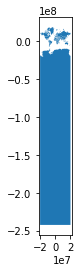

In [49]:
# Change coordinate system?? 
world = world.to_crs("EPSG:3395")  # This is supposed to be Mercator
ax = world.plot()